In [7]:
import numpy as np
import matplotlib.pyplot as plt
import csky as cy
from scipy import stats
import glob
import matplotlib.cm as cm
import matplotlib as mpl
import os
import photospline as psp
from csky import hyp



mpl.rcParams['xtick.labelsize']=18
mpl.rcParams['ytick.labelsize']=18
mpl.rcParams['axes.labelsize']=24
mpl.rcParams['lines.linewidth']=3
mpl.rcParams['patch.linewidth']=3
mpl.rcParams['legend.fontsize']=14
mpl.rcParams['axes.titlesize']=24
mpl.rcParams.update({'figure.autolayout': True})
mpl.rcParams['figure.figsize'] = 10, 6
mpl.rcParams['font.family'] = 'sans-serif'

trialfile_dir = '/data/user/wluszczak/KDE_csky/reproducibility/'

In [2]:
ntv5_data = np.load(trialfile_dir +'/ntv5/ntv5_sigtrials_0.0_ns.npy', allow_pickle=True)

ntv5_bg = []
bg_gammas = []
for trial in ntv5_data:
    tslist = trial['ts']
    gamlist = trial['gamma']
    sfts = tslist[0]
    ntv5_bg.append(sfts)
    bg_gammas.append(gamlist[0])
    
psv2bg = np.load(trialfile_dir +'/psv2/psv2_sigtrials_0.0_ns.npy', allow_pickle=True)

psv2_bg = []
for trial in psv2bg:
    tslist = trial['ts']
    gamlist = trial['gamma']
    sfts = tslist[0]
    psv2_bg.append(sfts)
psv2_bg = np.array(psv2_bg)

psv3bg = np.load(trialfile_dir +'/psv3/psv3_sigtrials_0.0_ns.npy', allow_pickle=True)

psv3_bg = []
for trial in psv3bg:
    tslist = trial['ts']
    gamlist = trial['gamma']
    sfts = tslist[0]
    psv3_bg.append(sfts)

psv3_bg = np.array(psv3_bg)

50000
24950


(0, 52.5)

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/RHEL_7_x86_64/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


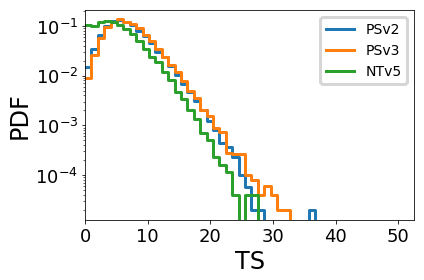

In [3]:
print(len(psv2_bg))
psv2bghist, psv2bgbins = np.histogram(psv2_bg, bins = np.linspace(0,50,50), density=True)
psv2bghist = np.concatenate([psv2bghist,[0]])
plt.semilogy(psv2bgbins, psv2bghist, drawstyle='steps-post', label='PSv2')

psv3bghist, psv3bgbins = np.histogram(psv3_bg, bins = np.linspace(0,50,50), density=True)
psv3bghist = np.concatenate([psv3bghist,[0]])
plt.semilogy(psv3bgbins, psv3bghist, drawstyle='steps-post', label='PSv3')

ntv5bghist, ntv5bgbins = np.histogram(ntv5_bg, bins = np.linspace(0,50,50), density=True)
ntv5bghist = np.concatenate([ntv5bghist,[0]])
plt.semilogy(ntv5bgbins, ntv5bghist, drawstyle='steps-post', label='NTv5')
print(len(ntv5_bg))

plt.xlabel('TS')
plt.ylabel('PDF')
plt.legend(loc=0)
plt.xlim(0,)

2.0 0.704 1000
4.0 0.838 1000
6.0 0.937 1000
8.0 0.959 1000
10.0 0.983 1000
12.0 0.992 1000
14.0 0.998 1000


(0, 52.5)

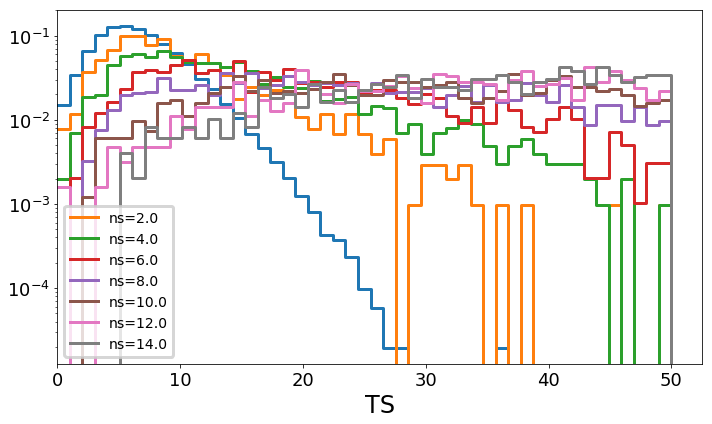

In [11]:
psv2bghist, psv2bgbins = np.histogram(psv2_bg, bins = np.linspace(0,50,50), density=True)
psv2bghist = np.concatenate([psv2bghist,[0]])
plt.semilogy(psv2bgbins, psv2bghist, drawstyle='steps-post')

bgmed_psv2 = np.median(psv2_bg)

ps_v2_effs = []
nss = []
for ns in np.arange(2.0, 16.0, 2.0):
    psv2sig = np.load(trialfile_dir+'/psv2/psv2_sigtrials_158dt_%s_ns.npy'%(ns), allow_pickle=True)
    
    psv2_sig = []
    for trial in psv2sig:
        tslist = trial['ts']
        gamlist = trial['gamma']
        sfts = tslist[0]
        psv2_sig.append(sfts)
    #print(psv2_sig)    
    psv2_sig = np.array(psv2_sig)
    print(ns, len(psv2_sig[psv2_sig>bgmed_psv2])/float(len(psv2_sig)), len(psv2_sig))
    eff = len(psv2_sig[psv2_sig>bgmed_psv2])/float(len(psv2_sig))
    psv2sighist, psv2sigbins = np.histogram(psv2_sig, bins = np.linspace(0,50,50), density=True)
    psv2sighist = np.concatenate([psv2sighist,[0]])
    plt.semilogy(psv2sigbins, psv2sighist, drawstyle='steps-post', label='ns=%s'%(ns))
    ps_v2_effs.append(eff)
    nss.append(ns)
    
plt.legend(loc=0)
plt.xlabel('TS')
plt.xlim(0,)

2.0 0.715 1000
4.0 0.85 1000
6.0 0.92 1000
8.0 0.958 1000
10.0 0.989 1000
12.0 0.99 1000
14.0 0.9977777777777778 900


(0, 52.5)

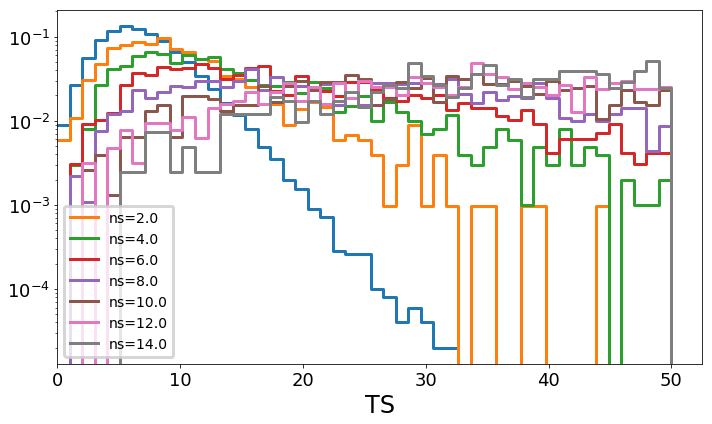

In [17]:
psv3bghist, psv3bgbins = np.histogram(psv3_bg, bins = np.linspace(0,50,50), density=True)
psv3bghist = np.concatenate([psv3bghist,[0]])
plt.semilogy(psv3bgbins, psv3bghist, drawstyle='steps-post')

bgmed_psv3 = np.median(psv3_bg)

ps_v3_effs = []
nss = []
for ns in np.arange(2.0, 16.0, 2.0):
    psv3sig = np.load(trialfile_dir+'/psv3/psv3_sigtrials_158dt_%s_ns.npy'%(ns), allow_pickle=True)
    
    psv3_sig = []
    for trial in psv3sig:
        tslist = trial['ts']
        gamlist = trial['gamma']
        sfts = tslist[0]
        psv3_sig.append(sfts)
    #print(psv2_sig)    
    psv3_sig = np.array(psv3_sig)
    print(ns, len(psv3_sig[psv3_sig>bgmed_psv3])/float(len(psv3_sig)), len(psv3_sig))
    eff = len(psv3_sig[psv3_sig>bgmed_psv3])/float(len(psv3_sig))
    psv3sighist, psv3sigbins = np.histogram(psv3_sig, bins = np.linspace(0,50,50), density=True)
    psv3sighist = np.concatenate([psv3sighist,[0]])
    plt.semilogy(psv3sigbins, psv3sighist, drawstyle='steps-post', label='ns=%s'%(ns))
    ps_v3_effs.append(eff)
    nss.append(ns)
    
plt.legend(loc=0)
plt.xlabel('TS')
plt.xlim(0,)

2.0 0.718 500
4.0 0.822 500
6.0 0.938 500
8.0 0.96 500
10.0 0.98 500
12.0 0.992 500
14.0 0.998 500


Text(0.5,0,'TS')

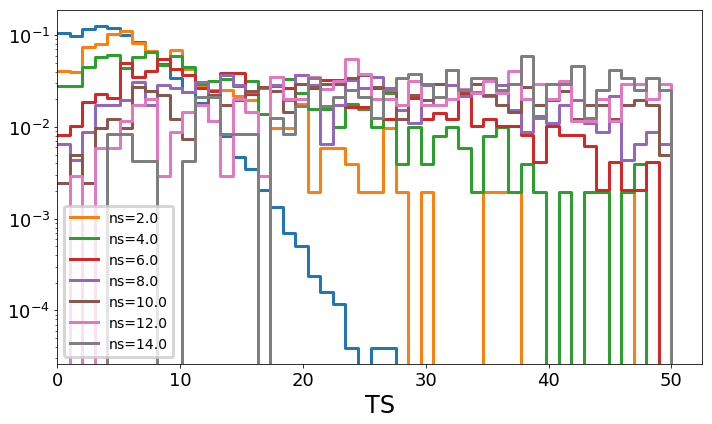

In [18]:
ntv5bghist, ntv5bgbins = np.histogram(ntv5_bg, bins = np.linspace(0,50,50), density=True)
ntv5bghist = np.concatenate([ntv5bghist,[0]])
plt.semilogy(ntv5bgbins, ntv5bghist, drawstyle='steps-post')

bgmed_ntv5 = np.median(ntv5_bg)

nt_v5_effs = []
nss = []
for ns in np.arange(2.0, 16.0, 2.0):
    ntv5sig = np.load(trialfile_dir+'/ntv5/ntv5_sigtrials_158dt_%s_ns.npy'%(ns), allow_pickle=True)
    
    ntv5_sig = []
    for trial in ntv5sig:
        tslist = trial['ts']
        gamlist = trial['gamma']
        sfts = tslist[0]
        ntv5_sig.append(sfts)
    ntv5_sig = np.array(ntv5_sig)
    print(ns, len(ntv5_sig[ntv5_sig>bgmed_ntv5])/float(len(ntv5_sig)), len(ntv5_sig))
    eff = len(ntv5_sig[ntv5_sig>bgmed_ntv5])/float(len(ntv5_sig))
    ntv5sighist, ntv5sigbins = np.histogram(ntv5_sig, bins = np.linspace(0,50,50), density=True)
    ntv5sighist = np.concatenate([ntv5sighist,[0]])
    plt.semilogy(ntv5sigbins, ntv5sighist, drawstyle='steps-post', label='ns=%s'%(ns))
    nt_v5_effs.append(eff)
    nss.append(ns)

plt.legend(loc=0)
plt.xlim(0,)
plt.xlabel('TS')

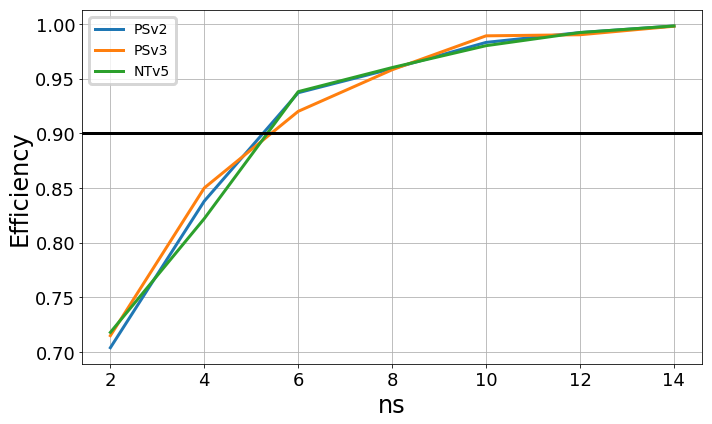

In [19]:
plt.plot(nss, ps_v2_effs, label='PSv2')
plt.plot(nss, ps_v3_effs, label='PSv3')
plt.plot(nss, nt_v5_effs, label='NTv5')
plt.axhline(0.9, color='k')

plt.grid()
plt.xlabel("ns")
plt.ylabel("Efficiency")
plt.legend(loc=0)

In [20]:
ana_psv2 = cy.get_analysis(cy.selections.repo, 'version-002-p03', cy.selections.PSDataSpecs.ps_10yr_separate[-6:-3])
ana_psv3 = cy.get_analysis(cy.selections.repo, 'version-003-p02', cy.selections.PSDataSpecs.ps_10yr_separate[-6:-3])
ana_ntv5 = cy.get_analysis(cy.selections.repo, 'version-005-p01', cy.selections.NTDataSpecs.nt_txs[0:1], min_sigma=0.0)

Setting up Analysis for:
IC86v3_2012, IC86v3_2013, IC86v3_2014
Setting up IC86v3_2012...
Reading /data/ana/analyses/ps_tracks/version-002-p03/IC86_2012_MC.npy ...
Reading /data/ana/analyses/ps_tracks/version-002-p03/IC86_2012_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-002-p03/GRL/IC86_2012_exp.npy ...
Energy PDF Ratio Model...
  * gamma = 4.0000 ...
Signal Acceptance Model...
  * gamma = 4.0000 ...
Setting up IC86v3_2013...
Reading /data/ana/analyses/ps_tracks/version-002-p03/IC86_2013_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-002-p03/GRL/IC86_2013_exp.npy ...
Energy PDF Ratio Model...
  * gamma = 4.0000 ...
Signal Acceptance Model...
  * gamma = 4.0000 ...
Setting up IC86v3_2014...
Reading /data/ana/analyses/ps_tracks/version-002-p03/IC86_2014_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-002-p03/GRL/IC86_2014_exp.npy ...
Energy PDF Ratio Model...
  * gamma = 4.0000 ...
Signal Acceptance Model...
  * gamma = 4.0000 ...
Done.
Setting up Analysis 

In [21]:
src = cy.sources(1.35049651, 0.09828762, name=50579430)

tr_psv2 = cy.get_trial_runner(ana = ana_psv2, src=src)
psv2_livetime = 0.
for a in ana_psv2:
    psv2_livetime+=a.livetime
    
tr_psv3 = cy.get_trial_runner(ana = ana_psv3, src=src)
psv3_livetime = 0.
for a in ana_psv3:
    psv3_livetime+=a.livetime
    
tr_ntv5 = cy.get_trial_runner(ana = ana_ntv5, src=src)
ntv5_livetime = 0.
for a in ana_ntv5:
    ntv5_livetime+=a.livetime

[2.1311149014573109e-16, 4.2622298029146217e-16, 6.393344704371933e-16, 8.524459605829243e-16, 1.0655574507286554e-15, 1.2786689408743866e-15, 1.4917804310201177e-15]
[1.8653156480654602e-16, 3.7306312961309205e-16, 5.59594694419638e-16, 7.461262592261841e-16, 9.3265782403273e-16, 1.119189388839276e-15, 1.3057209536458223e-15]
[1.7374055666613158e-16, 3.4748111333226317e-16, 5.212216699983947e-16, 6.949622266645263e-16, 8.687027833306583e-16, 1.0424433399967894e-15, 1.2161838966629214e-15]


/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/RHEL_7_x86_64/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


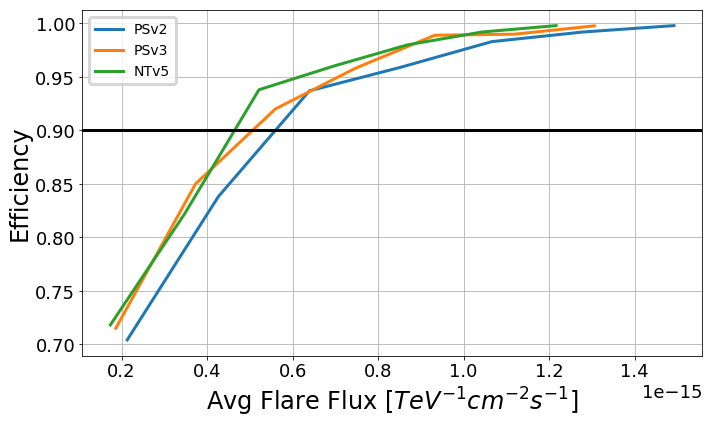

In [22]:
flux_v2 = [tr_psv2.to_dNdE(n*psv2_livetime/1.365e+7, E0=100, unit=1e3, gamma=2.2) for n in nss]
print(flux_v2)

flux_v3 = [tr_psv3.to_dNdE(n*psv3_livetime/1.365e+7, E0=100, unit=1e3, gamma=2.2) for n in nss]
print(flux_v3)

flux_ntv5 = [tr_ntv5.to_dNdE(n*ntv5_livetime/1.365e+7, E0=100, unit=1e3, gamma=2.2) for n in nss]
print(flux_ntv5)

plt.plot(flux_v2, ps_v2_effs, label='PSv2')
plt.plot(flux_v3, ps_v3_effs, label='PSv3')
plt.plot(flux_ntv5, nt_v5_effs, label='NTv5')
plt.axhline(0.9, color='k')

plt.grid()
plt.xlabel("Avg Flare Flux [$TeV^{-1} cm^{-2} s^{-1}$]")
plt.ylabel("Efficiency")
plt.legend(loc=0)